In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

In [2]:
df=pd.read_csv("Synnax Kaggle 1 Train.csv")

In [3]:
df.head()

,quarter_day_label,q1_1,q1_2,q1_3,q1_4,q1_5,q1_6,q1_7,q1_8,q1_9,...,q3_83,q3_84,q3_85,q3_86,q3_87,q3_88,q3_89,q3_90,q3_91,q3_92
0,tax_effect_of_unusual_items,-92628,-86829,-75074,-79744,-93119,-83990,-72336,-72778,-65196,...,-17697,-22915,-21247,-20581,-17364,-22588,-21463,-23010,-20692,-15048
1,reconciled_depreciation,249593,295426,284126,255778,298705,257857,222372,278122,215063,...,812859,652658,683840,717615,583314,684132,699633,732228,662322,1777417
2,reconciled_cost_of_revenue,726156,617270,550131,609768,628772,614452,576283,525452,563534,...,678462,582796,581133,581931,625793,520602,506575,593623,695095,328903
3,net_interest_income,0,0,0,0,0,0,0,0,0,...,45241,45241,45241,0,0,0,0,0,0,0
4,interest_income,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df=df.transpose()

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
quarter_day_label,tax_effect_of_unusual_items,reconciled_depreciation,reconciled_cost_of_revenue,net_interest_income,interest_income,total_expenses,tax_provision,other_income_expense,other_non_operating_income_expenses,special_income_charges,...,current_deferred_revenue,current_capital_lease_obligation,pensionand_other_post_retirement_benefit_plans...,payables_and_accrued_expenses,current_accrued_expenses,accounts_payable,other_non_current_assets,non_current_prepaid_assets,financial_assets,other_intangible_assets
q1_1,-92628,249593,726156,0,0,1105282,-69538,-4303428,75224,-6283549,...,13220399,1389204,5900799,64347348,40783752,14927002,356500,0,167327302,20163749
q1_2,-86829,295426,617270,0,0,998330,-67355,-5002715,59177,-5938779,...,13189016,1393163,5876728,64044908,40503402,15000866,356500,0,167138077,20239479
q1_3,-75074,284126,550131,0,0,1145334,-75659,-5049685,83940,-5030053,...,13157638,1397118,5852658,63742476,40223057,15074740,356500,0,166948853,20315200
q1_4,-79744,255778,609768,0,0,850817,-85769,-4546880,83963,-5776491,...,13126250,1401084,5828576,63440039,39942713,15148605,356500,0,166759628,20390928


In [6]:
df.columns=df.iloc[0]

In [7]:
df.columns

Index(['tax_effect_of_unusual_items', 'reconciled_depreciation',
       'reconciled_cost_of_revenue', 'net_interest_income', 'interest_income',
       'total_expenses', 'tax_provision', 'other_income_expense',
       'other_non_operating_income_expenses', 'special_income_charges',
       'other_special_charges', 'write_off', 'impairment_of_capital_assets',
       'restructuring_and_m&a', 'gain_on_sale_of_security',
       'net_non_operating_interest_income_expense', 'total_other_finance_cost',
       'interest_income_non_operating',
       'depreciation_and_amortization_in_income_statement',
       'selling_general_and_administration', 'cost_of_revenue',
       'total_revenue', 'invested_capital', 'working_capital',
       'capital_lease_obligations', 'retained_earnings', 'common_stock',
       'other_non_current_liabilities', 'derivative_product_liabilities',
       'non_current_deferred_revenue', 'long_term_capital_lease_obligation',
       'other_current_liabilities', 'current_defer

In [8]:
df = df[1:]

In [9]:
df

quarter_day_label,tax_effect_of_unusual_items,reconciled_depreciation,reconciled_cost_of_revenue,net_interest_income,interest_income,total_expenses,tax_provision,other_income_expense,other_non_operating_income_expenses,special_income_charges,...,current_deferred_revenue,current_capital_lease_obligation,pensionand_other_post_retirement_benefit_plans_current,payables_and_accrued_expenses,current_accrued_expenses,accounts_payable,other_non_current_assets,non_current_prepaid_assets,financial_assets,other_intangible_assets
q1_1,-92628,249593,726156,0,0,1105282,-69538,-4303428,75224,-6283549,...,13220399,1389204,5900799,64347348,40783752,14927002,356500,0,167327302,20163749
q1_2,-86829,295426,617270,0,0,998330,-67355,-5002715,59177,-5938779,...,13189016,1393163,5876728,64044908,40503402,15000866,356500,0,167138077,20239479
q1_3,-75074,284126,550131,0,0,1145334,-75659,-5049685,83940,-5030053,...,13157638,1397118,5852658,63742476,40223057,15074740,356500,0,166948853,20315200
q1_4,-79744,255778,609768,0,0,850817,-85769,-4546880,83963,-5776491,...,13126250,1401084,5828576,63440039,39942713,15148605,356500,0,166759628,20390928
q1_5,-93119,298705,628772,0,0,931185,-73783,-3972094,61068,-6163793,...,13094873,1405046,5804494,63137588,39662367,15222478,356500,0,166570394,20466652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
q3_88,-22588,684132,520602,0,0,1343109,-37514,-1199176,89281,-803749,...,13151345,2294681,9697834,85163247,64243722,20919526,356500,10534000,113603844,35955708
q3_89,-21463,699633,506575,0,0,1731310,-31230,-1210180,80986,-1137209,...,13120309,2298596,9740699,85528947,64536369,20992579,356500,10534000,113416690,36063573
q3_90,-23010,732228,593623,0,0,1612524,-41239,-990986,83684,-1128129,...,13089265,2302514,9783570,85894647,64829018,21065637,356500,10534000,113229541,36171429
q3_91,-20692,662322,695095,0,0,1682582,-38841,-911687,60535,-1119492,...,13058226,2306434,9826437,86260349,65121663,21138693,356500,10534000,113042402,36279285


In [10]:
df.tail()

quarter_day_label,tax_effect_of_unusual_items,reconciled_depreciation,reconciled_cost_of_revenue,net_interest_income,interest_income,total_expenses,tax_provision,other_income_expense,other_non_operating_income_expenses,special_income_charges,...,current_deferred_revenue,current_capital_lease_obligation,pensionand_other_post_retirement_benefit_plans_current,payables_and_accrued_expenses,current_accrued_expenses,accounts_payable,other_non_current_assets,non_current_prepaid_assets,financial_assets,other_intangible_assets
q3_88,-22588,684132,520602,0,0,1343109,-37514,-1199176,89281,-803749,...,13151345,2294681,9697834,85163247,64243722,20919526,356500,10534000,113603844,35955708
q3_89,-21463,699633,506575,0,0,1731310,-31230,-1210180,80986,-1137209,...,13120309,2298596,9740699,85528947,64536369,20992579,356500,10534000,113416690,36063573
q3_90,-23010,732228,593623,0,0,1612524,-41239,-990986,83684,-1128129,...,13089265,2302514,9783570,85894647,64829018,21065637,356500,10534000,113229541,36171429
q3_91,-20692,662322,695095,0,0,1682582,-38841,-911687,60535,-1119492,...,13058226,2306434,9826437,86260349,65121663,21138693,356500,10534000,113042402,36279285
q3_92,-15048,1777417,328903,0,0,1277671,-45369,-2144198,110173,-1554693,...,13027200,2310350,9869300,86626050,65414300,21211750,356500,10534000,112855250,36387150


In [11]:
df1=df

In [12]:
df1["Date"]=pd.date_range("04/01/2022", datetime.strptime("01/01/2023", "%d/%m/%Y") - timedelta(days=1), freq='d')

In [14]:
columns = df1.columns.tolist()
columns = [columns[-1]] + columns[:-1]
df1 = df1[columns]


In [15]:
df1["net_interest_income"].unique()

array([0, '0', 40020, 45241], dtype=object)

In [16]:
df1["net_interest_income"].value_counts()

net_interest_income
0        244
40020     12
45241     10
0          9
Name: count, dtype: int64

In [ ]:
df1["net_interest_income"].dtype

In [ ]:
for col in df1.columns:
    if df1[col].dtype=='O':
        print(col)

In [38]:
from ydata_profiling import ProfileReport

In [53]:
profile = ProfileReport(df1)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df1.head(15)

quarter_day_label,Date,tax_effect_of_unusual_items,reconciled_depreciation,reconciled_cost_of_revenue,net_interest_income,interest_income,total_expenses,tax_provision,other_income_expense,other_non_operating_income_expenses,...,current_deferred_revenue,current_capital_lease_obligation,pensionand_other_post_retirement_benefit_plans_current,payables_and_accrued_expenses,current_accrued_expenses,accounts_payable,other_non_current_assets,non_current_prepaid_assets,financial_assets,other_intangible_assets
q1_1,2022-04-01,-92628,249593,726156,0,0,1105282,-69538,-4303428,75224,...,13220399,1389204,5900799,64347348,40783752,14927002,356500,0,167327302,20163749
q1_2,2022-04-02,-86829,295426,617270,0,0,998330,-67355,-5002715,59177,...,13189016,1393163,5876728,64044908,40503402,15000866,356500,0,167138077,20239479
q1_3,2022-04-03,-75074,284126,550131,0,0,1145334,-75659,-5049685,83940,...,13157638,1397118,5852658,63742476,40223057,15074740,356500,0,166948853,20315200
q1_4,2022-04-04,-79744,255778,609768,0,0,850817,-85769,-4546880,83963,...,13126250,1401084,5828576,63440039,39942713,15148605,356500,0,166759628,20390928
q1_5,2022-04-05,-93119,298705,628772,0,0,931185,-73783,-3972094,61068,...,13094873,1405046,5804494,63137588,39662367,15222478,356500,0,166570394,20466652
q1_6,2022-04-06,-83990,257857,614452,0,0,1091206,-75728,-3714451,71845,...,13063494,1409006,5780434,62835152,39382020,15296344,356500,0,166381169,20542372
q1_7,2022-04-07,-72336,222372,576283,0,0,1130528,-80601,-5359758,65798,...,13032112,1412970,5756347,62532709,39101671,15370214,356500,0,166191945,20618104
q1_8,2022-04-08,-72778,278122,525452,0,0,835588,-82771,-4403803,71266,...,13000730,1416931,5732290,62230273,38821329,15444083,356500,0,166002719,20693821
q1_9,2022-04-09,-65196,215063,563534,0,0,1141611,-79117,-4086827,73146,...,12969343,1420887,5708198,61927829,38540992,15517947,356500,0,165813493,20769544
q1_10,2022-04-10,-72797,266066,672402,0,0,917951,-88847,-4932708,70750,...,12937964,1424854,5684130,61625393,38260634,15591811,356500,0,165624265,20845273


In [22]:
tax_effect=df1.iloc[:,0:2]

In [20]:
df1=df1.reset_index(drop=True)

In [23]:
tax_effect

quarter_day_label,Date,tax_effect_of_unusual_items
0,2022-04-01,-92628
1,2022-04-02,-86829
2,2022-04-03,-75074
3,2022-04-04,-79744
4,2022-04-05,-93119
...,...,...
270,2022-12-27,-22588
271,2022-12-28,-21463
272,2022-12-29,-23010
273,2022-12-30,-20692


In [24]:
tax_effect=tax_effect.set_index("Date")


In [26]:
tax_effect.columns

Index(['tax_effect_of_unusual_items'], dtype='object', name='quarter_day_label')

In [27]:
tax_effect.describe()

quarter_day_label,tax_effect_of_unusual_items
count,275
unique,274
top,-18596
freq,2


In [33]:
tax_effect.tax_effect_of_unusual_items.unique()

array([-92628, -86829, -75074, -79744, -93119, -83990, -72336, -72778,
       -65196, -72797, -77334, '-71,438.00', '-89,418.00', -62615, -92183,
       -81452, '-66696', '-66978', '-73042', -90031, -64674, -87583,
       -87795, -68081, -80920, -63668, -73007, -81741, -80012, -77110,
       -63344, -87933, -67898, -87905, -86527, -77188, -73297, -85540,
       -78129, -88728, -77344, -82052, -89137, -74976, -88585, -84260,
       -74084, -75350, -87012, -71508, -63542, -85885, -90110, -86438,
       -85230, -87020, -68122, -78467, -85961, -78825, -72296, -68387,
       -71089, -78512, -79758, -73939, -76157, -70370, -89462, -82132,
       -83775, -70791, -69150, -66627, -78596, -92839, -83035, -92209,
       -93258, -66007, -83842, -78124, -79551, -63219, -65347, -85527,
       -65089, -75876, -72483, -66447, -74484, -14935, -14420, -15245,
       -13882, -10657, -14735, -15040, -13205, -11368, -12005, -12493,
       -12979, -11058, -15483, -12731, -10972, -12865, -13935, -14199,
    

In [49]:
tax_effect["tax_effect_of_unusual_items"] = tax_effect["tax_effect_of_unusual_items"].replace({',': ''}, regex=True).astype(float)

In [50]:
tax_effect["tax_effect_of_unusual_items"]=tax_effect["tax_effect_of_unusual_items"].astype('int64')

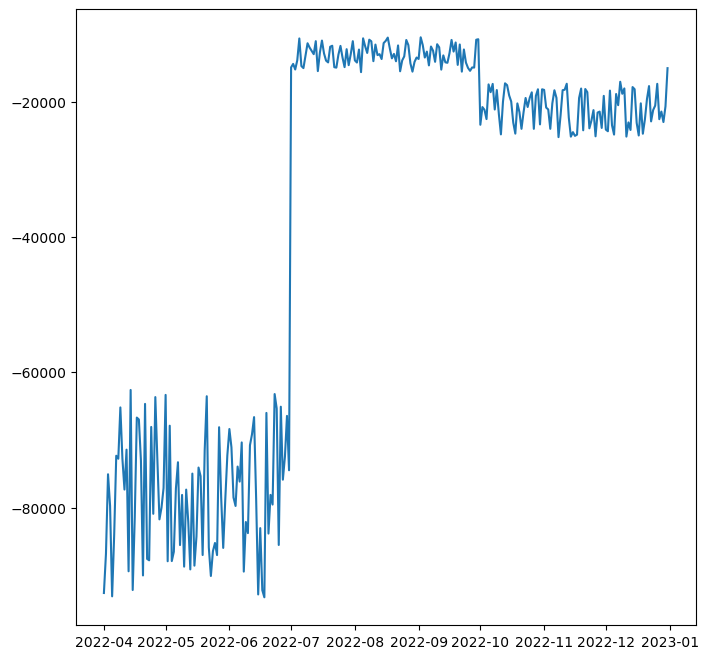

In [51]:
plt.figure(figsize=(8,8))
plt.plot(tax_effect.tax_effect_of_unusual_items)

(array([ 27.,  24.,  22.,  18.,   0.,   0.,   0.,   0.,  67., 117.]),
 array([-93258. , -84980.5, -76703. , -68425.5, -60148. , -51870.5,
        -43593. , -35315.5, -27038. , -18760.5, -10483. ]),
 <BarContainer object of 10 artists>)

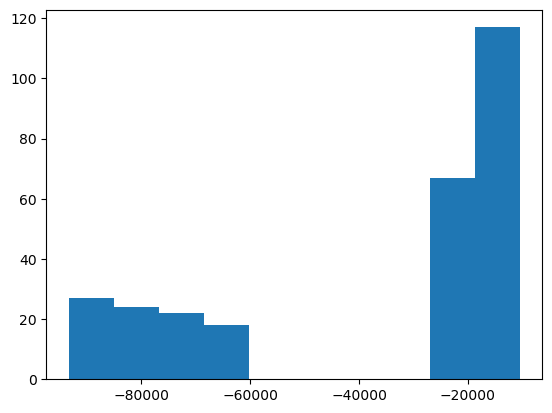

In [53]:
plt.hist(tax_effect["tax_effect_of_unusual_items"])

In [56]:
from statsmodels.tsa.stattools import adfuller
adf=adfuller(tax_effect["tax_effect_of_unusual_items"])

In [57]:
adf

(-1.650100722449967,
 0.4569878955364548,
 12,
 262,
 {'1%': -3.455558114028747,
  '5%': -2.872635586277424,
  '10%': -2.572682677000175},
 5300.372758324883)

In [58]:
pd.Series(adf[0:4],index=["test stats","p-value","lag","data point"])

test stats     -1.650101
p-value         0.456988
lag            12.000000
data point    262.000000
dtype: float64